In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import f1_score, precision_score, recall_score

from scipy.stats import zscore


In [57]:
import os,zipfile
# os.mkdir('dataset')
dataset = 'dataset'
target_file = 'heart-attack-dataset.zip'

In [58]:
with zipfile.ZipFile(target_file, 'r') as extracting:
    extracting.extractall(dataset)

In [59]:
df = pd.read_csv(f"{dataset}/Medicaldataset.csv")
df.head()

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin,Result
0,63,1,66,160,83,160.0,1.80,0.012,negative
1,20,1,94,98,46,296.0,6.75,1.060,positive
2,56,1,64,160,77,270.0,1.99,0.003,negative
3,66,1,70,120,55,270.0,13.87,0.122,positive
4,54,1,64,112,65,300.0,1.08,0.003,negative


In [60]:
df.isnull().sum()

Age                         0
Gender                      0
Heart rate                  0
Systolic blood pressure     0
Diastolic blood pressure    0
Blood sugar                 0
CK-MB                       0
Troponin                    0
Result                      0
dtype: int64

In [61]:
df.dtypes

Age                           int64
Gender                        int64
Heart rate                    int64
Systolic blood pressure       int64
Diastolic blood pressure      int64
Blood sugar                 float64
CK-MB                       float64
Troponin                    float64
Result                       object
dtype: object

In [62]:
df = df.rename(columns={"Systolic blood pressure":"ap_hi", "Diastolic blood pressure":"ap_lo"})

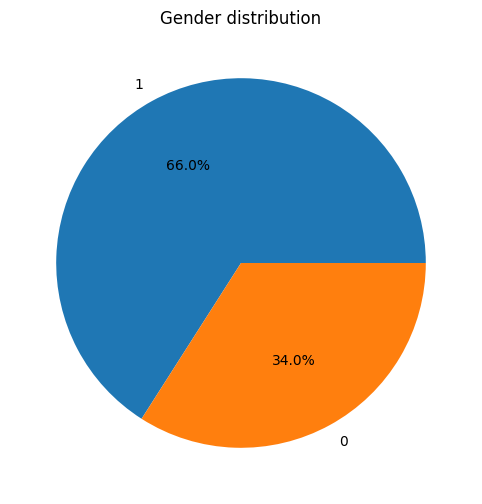

In [63]:
# check for gender distribution
plt.figure(figsize=(8, 6))
sizes = df["Gender"].value_counts()
plt.pie(sizes, labels=sizes.index, autopct="%1.1f%%")
plt.title("Gender distribution")
plt.show()

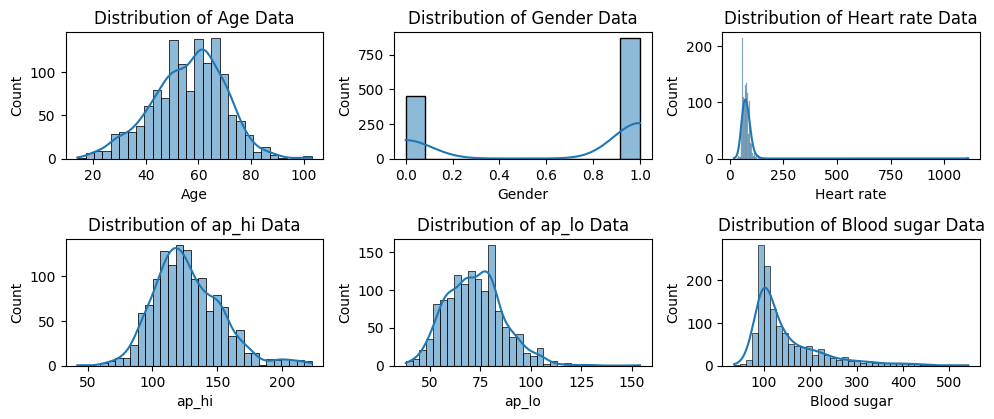

In [64]:
columns = ["Age", "Gender", "Heart rate", "ap_hi", "ap_lo", "Blood sugar"]
plt.figure(figsize=(10, 8))
for i, col in enumerate(columns, 1):
    plt.subplot(4, 3, i)
    plt.title(f"Distribution of {col} Data")
    sns.histplot(df[col], kde=True)
    plt.tight_layout()
    plt.plot()

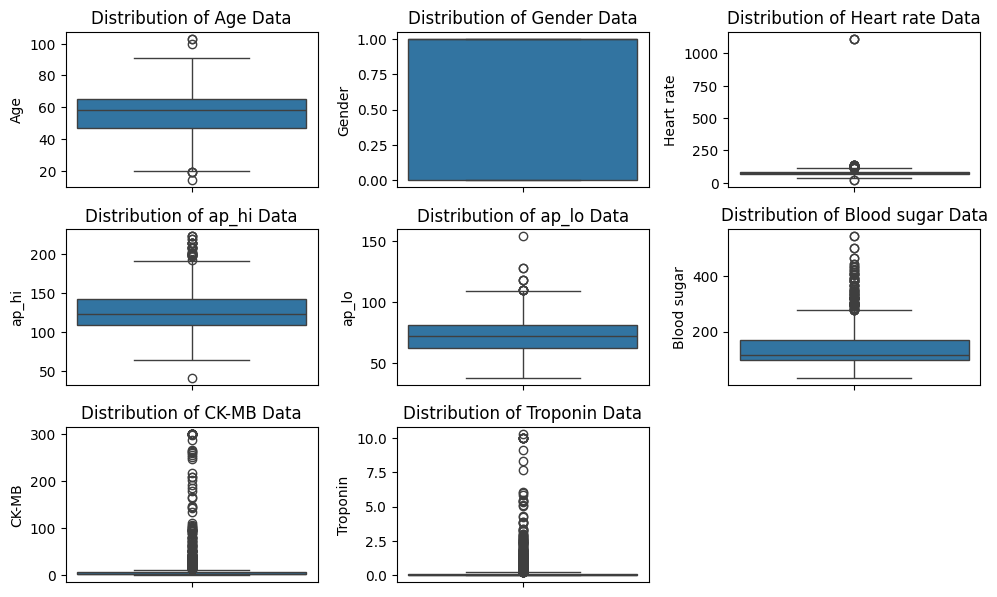

In [65]:
plt.figure(figsize=(10,8))
for i,col in enumerate(df.columns[:-1],1):
    plt.subplot(4,3,i)
    plt.title(f"Distribution of {col} Data")
    sns.boxplot(df[col])
    plt.tight_layout()
    plt.plot()

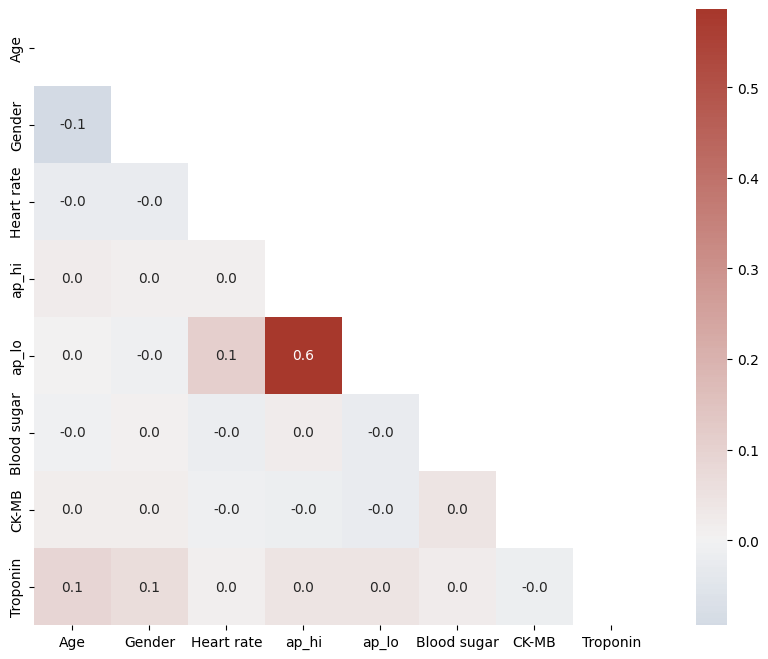

In [66]:
corr = df.corr(numeric_only=True)
mask = np.triu(np.ones_like(corr, dtype=bool))
# Create a custom diverging palette
cmap = sns.diverging_palette(250, 15, s=75, l=40,
                             n=9, center="light", as_cmap=True)
plt.figure(figsize=(12, 8))
sns.heatmap(corr, mask=mask, center=0, annot=True,
             fmt=".1f", square=True, cmap=cmap)
plt.show()

In [67]:
# Create an instance of LabelEncoder
label_encoder = LabelEncoder()

X = df.drop('Result', axis=1)
y = df['Result']
y_encoded = label_encoder.fit_transform(df['Result'])

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

In [68]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 108 candidates, totalling 324 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             verbose=2)

In [69]:
best_params = grid_search.best_params_
print("Best parameters found: ", best_params)

best_model = RandomForestClassifier(**best_params, random_state=42)
best_model.fit(X_train, y_train)
predictions = best_model.predict(X_test)

Best parameters found:  {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 50}


In [70]:
# Evaluate model
accuracy = accuracy_score(y_test, predictions)
conf_matrix = confusion_matrix(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)

In [72]:
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Accuracy: 0.9810606060606061
Precision: 0.9817073170731707
Recall: 0.9877300613496932
F1 Score: 0.9847094801223242


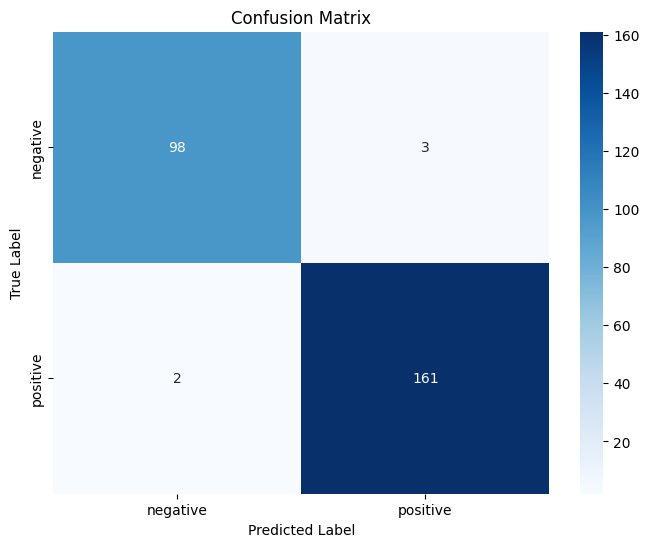

In [73]:
# Visualize Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
